In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
data= keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels)= data.load_data()

class_names= ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

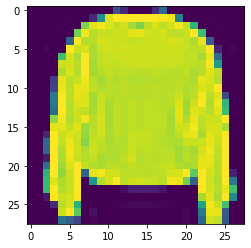

In [3]:
plt.imshow(train_images[7])
plt.show()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
# 60,000 images, each image is 28*28 with rgb pixel values till range 255(black). 
train_images[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

In [6]:
# normalize the data to be within 0-1 range
train_images= train_images/255.0
test_images= test_images/255.0

In [7]:
train_images[7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.24705882, 0.10980392, 0.        , 0.        ,
        0.        , 0.12941176, 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.10980392, 0.49411765,
        0.94509804, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.98823529, 0.97254902, 0.43529412,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.80784314, 0.95686275, 0.98431373,
        0.94509804, 0.90196078, 0.93333333, 0.86666667, 0.80392157,
        0.90196078, 0.9411

In [8]:
train_labels[7]

2

# Building the model

Flatten the data to get 28*28= 784 inputs and for output we can have one node for each class, thus 10 outputs, each giving the prob using softmax. The one with highest prob is the predicted class. One hidden layer with 128 neurons

In [ ]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation= 'softmax')
])

print(model.summary)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch= 32)


#evaluate on test data
test_loss, test_acc= model.evaluate(test_images, test_labels)

print("Test accuracy", test_acc)

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=[28, 28, 1]))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
